In [1]:
from losses import binary_crossentropy 
from tensorflow.keras.utils import plot_model
from eunet import build_EUNet
from loading_preprocessing_dataset import prepare_dataset, create_dataset
import matplotlib.pyplot as plt
import os
import tensorflow as tf

In [2]:
os.environ["CUDA_VISIBLE_DEVICES"]="0"
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

tf.python.client.device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 2484072899457028655,
 name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 14400321443155110607
 physical_device_desc: "device: XLA_CPU device",
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 7215041760
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 6402199853284475243
 physical_device_desc: "device: 0, name: GeForce RTX 2080, pci bus id: 0000:01:00.0, compute capability: 7.5",
 name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 12144651666102045987
 physical_device_desc: "device: XLA_GPU device"]

## 1. Build Efficient U-Net 

In [3]:
model = build_EUNet(number_classes = 1, input_height = 256, input_width = 256)

In [4]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 13) 364         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 128, 128, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 128, 128, 16) 0           conv2d[0][0]                     
                                                                 max_pooling2d[0][0]          

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0500452 to fit



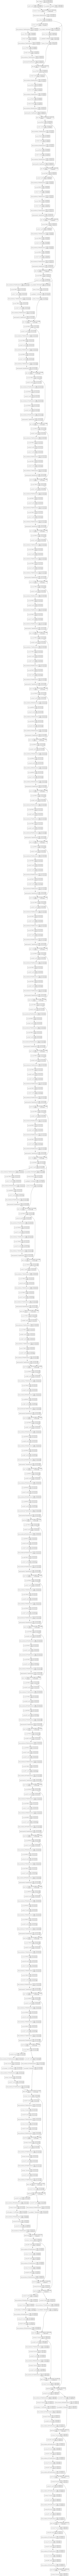

In [6]:
plot_model( model,
            to_file='model.png',
            show_shapes=True,
            show_layer_names=True,
            dpi=1024)

In [7]:
model.compile("adam", loss=binary_crossentropy)

## 2. Load and Prepare Train, Validation and Test tasets

In [8]:
Train_Dataset_dir = "/media/rima/C/Datasets/cut_tirol/Klein_Dataset2/train/"
Valid_Dataset_dir = "/media/rima/C/Datasets/cut_tirol/Klein_Dataset2/valid/"
Test_Dataset_dir = "/media/rima/C/Datasets/cut_tirol/Klein_Dataset2/test/"

In [14]:
train_sb_dir, train_gt_dir, sb_train_list, gt_train_list = prepare_dataset(Train_Dataset_dir) #load Satellite und Ground Truths Data
valid_sb_dir, valid_gt_dir, sb_valid_list, gt_valid_list = prepare_dataset(Valid_Dataset_dir)
test_sb_dir, test_gt_dir, sb_test_list, gt_test_list = prepare_dataset(Test_Dataset_dir)

Satellite Directory: /media/rima/C/Datasets/cut_tirol/Klein_Dataset2/train/Croped_SB/
Number of  ground truths: 6876

Ground Truths Directory: /media/rima/C/Datasets/cut_tirol/Klein_Dataset2/train/Croped_GT/
Number der satellien images: 6876
*********************************************
Satellite Directory: /media/rima/C/Datasets/cut_tirol/Klein_Dataset2/valid/Croped_SB/
Number of  ground truths: 756

Ground Truths Directory: /media/rima/C/Datasets/cut_tirol/Klein_Dataset2/valid/Croped_GT/
Number der satellien images: 756
*********************************************
Satellite Directory: /media/rima/C/Datasets/cut_tirol/Klein_Dataset2/test/Croped_SB/
Number of  ground truths: 774

Ground Truths Directory: /media/rima/C/Datasets/cut_tirol/Klein_Dataset2/test/Croped_GT/
Number der satellien images: 774
*********************************************


In [15]:
IMG_WIDTH = 256
IMG_HEIGHT = 256
N_CHANNELS = 3
number_batches = 2 #
buffer_size =  20000

In [16]:
train_dataset = create_dataset(sb_train_list, gt_train_list, buffer_size =  buffer_size, number_batche = number_batches )
validation_dataset = create_dataset(sb_valid_list, gt_valid_list, buffer_size =  buffer_size, number_batche = number_batches )
test_dataset = create_dataset(sb_test_list, gt_test_list, buffer_size =  buffer_size, number_batche = number_batches )

(2, 256, 256, 3) (2, 256, 256, 1)


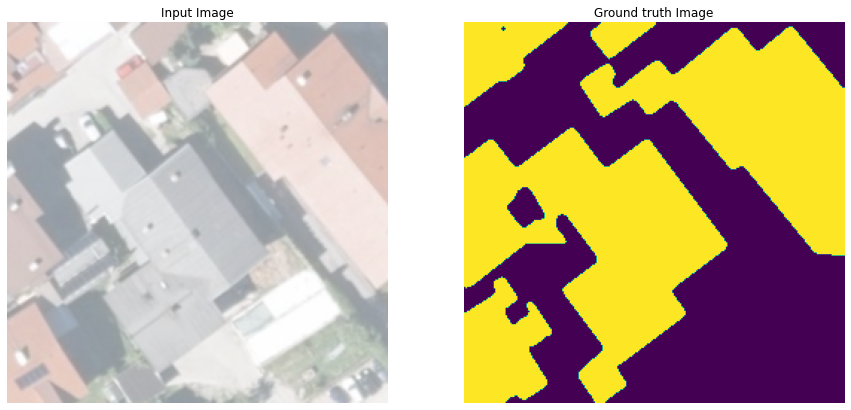

In [21]:
for SB, GT in validation_dataset.take(1):
    plt.figure(figsize=(15,15))
    print(SB.shape, GT.shape)
    display_list=[SB[0,:,:,:,],GT[0,:,:,:,]]
    title = ['Input Image', 'Ground truth Image']
    for i in range(2):
        plt.subplot(1, 2, i+1)
        plt.title(title[i])
        plt.imshow(display_list[i]*.5+.5 )
        plt.axis('off')
    plt.show()

In [22]:
model.fit(train_dataset,
          epochs= 50,
          verbose=1,
          callbacks=None,
          validation_data= validation_dataset,)

Epoch 1/50
3438/3438 [==============================] - 164s 48ms/step - loss: 0.2315 - val_loss: 0.1753
Epoch 2/50
3438/3438 [==============================] - 165s 48ms/step - loss: 0.2278 - val_loss: 0.1573
Epoch 3/50
3438/3438 [==============================] - 164s 48ms/step - loss: 0.2292 - val_loss: 0.1845
Epoch 4/50
3438/3438 [==============================] - 166s 48ms/step - loss: 0.2238 - val_loss: 0.1904
Epoch 5/50
3438/3438 [==============================] - 166s 48ms/step - loss: 0.2255 - val_loss: 0.2257
Epoch 6/50
3438/3438 [==============================] - 166s 48ms/step - loss: 0.2249 - val_loss: 0.2064
Epoch 7/50
3438/3438 [==============================] - 166s 48ms/step - loss: 0.2180 - val_loss: 0.1541
Epoch 8/50
3438/3438 [==============================] - 166s 48ms/step - loss: 0.2169 - val_loss: 0.1614
Epoch 9/50
3438/3438 [==============================] - 166s 48ms/step - loss: 0.2116 - val_loss: 0.2539
Epoch 10/50
3438/3438 [==============================] 